# Базовая часть

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## 1

In [12]:
def rk4(x_0, t_n, f, h):

    t = np.arange(0, t_n + h, h)
    trajectory = np.zeros((len(t), len(x_0)))
    trajectory[0] = x_0

    for i in range(len(t) - 1):
        k1 = h * f(t[i], trajectory[i])
        k2 = h * f(t[i] + h/2, trajectory[i] + k1/2)
        k3 = h * f(t[i] + h/2, trajectory[i] + k2/2)
        k4 = h * f(t[i] + h, trajectory[i] + k3)
        trajectory[i + 1] = trajectory[i] + (k1 + 2 * k2 + 2 * k3 + k4)/6

    return t, trajectory

## 2

In [13]:
# N = 10 => alpha = 10 mod 10 + 1 = 1
alpha = 1           # Коэффициент рождаемости «жертв»
beta = 0.002        # Коэффициент убыли «жертв»
delta = 0.0006      # Коэффициент рождаемости «хищников»
gamma = 0.5         # Коэффициент убыли «хищников»

In [14]:
def lotka_volterra(t, trajectory):

    x_val = trajectory[0]
    y_val = trajectory[1]

    dx_dt = alpha * x_val - beta * x_val * y_val
    dy_dt = delta * x_val * y_val - gamma * y_val

    return np.array([dx_dt, dy_dt])

In [15]:
tn = 50  # Конечное время
h = 0.05  # Шаг по времени

# Вычисление траекторий для различных начальных условий
trajectories = []
for i in range(1, 11):
    for j in range(1, 11):
        x0 = np.array([200*i, 200*j])
        t, trajectory = rk4(x0, tn, lotka_volterra, h)
        trajectories.append((t, trajectory))

In [16]:
trajectories[0]

(array([ 0.  ,  0.05,  0.1 , ..., 49.9 , 49.95, 50.  ]),
 array([[200.        , 200.        ],
        [206.12969762, 196.25378817],
        [212.52573   , 192.61392785],
        ...,
        [ 94.06116844, 464.36384844],
        [ 94.44521986, 454.18098005],
        [ 94.92636316, 444.22717417]]))

## 3

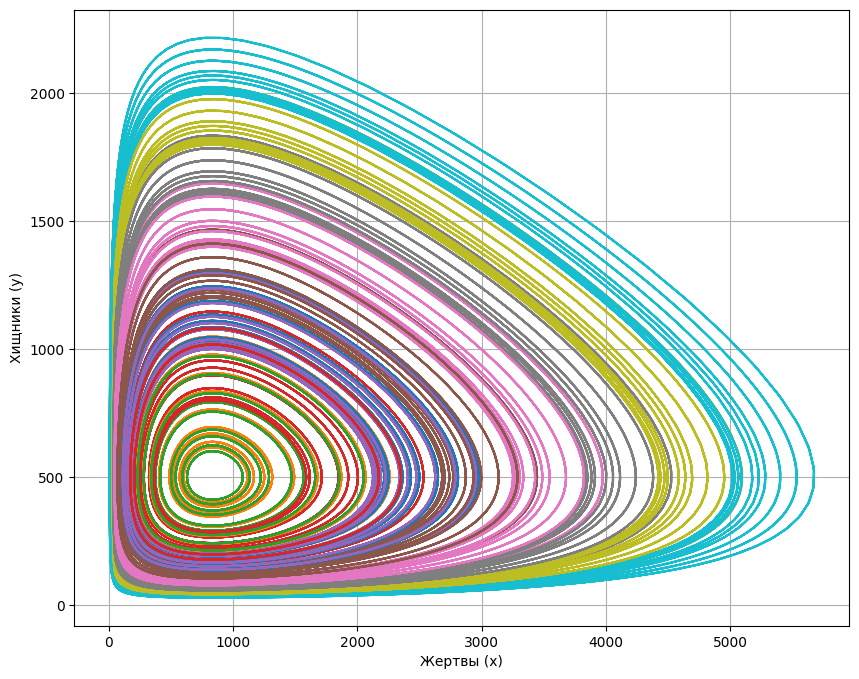

In [17]:
# Фазовый портрет
plt.figure(figsize=(10, 8))
for t, traj in trajectories:
    plt.plot(traj[:, 0], traj[:, 1])
plt.xlabel('Жертвы (x)')
plt.ylabel('Хищники (y)')
plt.grid(True)
plt.show()

In [18]:
tn = 50  # Конечное время
h = 0.05  # Шаг по времени

# Вычисление траекторий для различных начальных условий
trajectories_r = []
i = 5
j = 5

x0_r = np.array([200*i, 200*j])
t_r, trajectory_r = rk4(x0, tn, lotka_volterra, h)
trajectories_r.append((t, trajectory,))

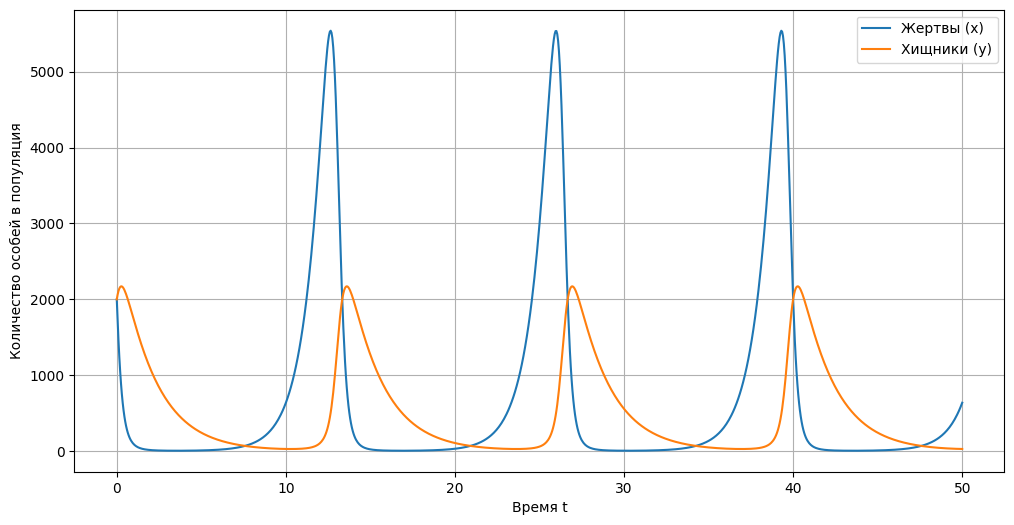

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(t_r, trajectory_r[:, 0], label='Жертвы (x)')
plt.plot(t_r, trajectory_r[:, 1], label='Хищники (y)')
plt.xlabel('Время t')
plt.ylabel('Количество особей в популяция')
# plt.title('Динамика популяций жертв и хищников для i = 5, j = 5')
plt.legend()
plt.grid(True)
plt.show()

# Продвинутая часть

## 5

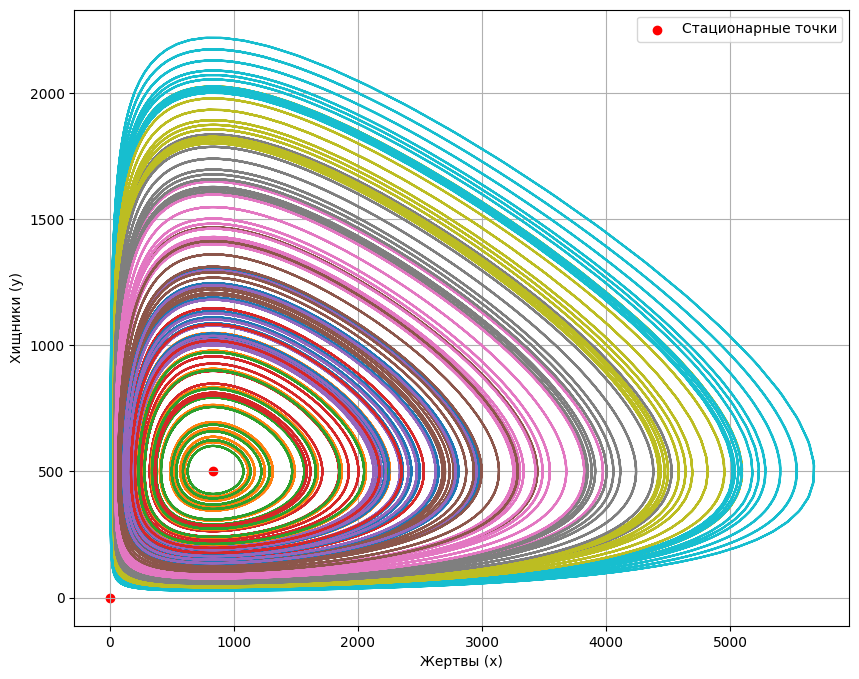

In [20]:
plt.figure(figsize=(10, 8))
for t, traj in trajectories:
    plt.plot(traj[:, 0], traj[:, 1])

x_stationary = [0, 833.33]
y_stationary = [0, 500]
plt.scatter(x_stationary, y_stationary, color='red', label='Стационарные точки')
plt.legend()

plt.xlabel('Жертвы (x)')
plt.ylabel('Хищники (y)')
plt.grid(True)
plt.show()

## 6

In [31]:
def newton(x_0, f, J, eps=1e-8):
    x = x_0.copy()
    iter_count = 0

    while True:
        iter_count += 1
        J_x = J(x)                            # Вычисление матрицы Якоби
        f_x = f(x)                            # Вычисление вектор-функции
        delta_x = np.linalg.solve(J_x, -f_x)  # Решение СЛАУ
        x_new = x + delta_x

        if np.linalg.norm(delta_x, ord=np.inf) < eps:
            break

        x = x_new

    return iter_count, x

## 7

In [22]:
def gradient_descent(x_0, f, J, eps=1e-8):
    x = x_0.copy()
    iter_count = 0

    while True:
        iter_count += 1

        J_x = J(x)
        f_x = f(x)
        z = J_x.T @ f_x
        z_norm = np.linalg.norm(z)

        if z_norm < eps:
            break

        # Квадратичная интерполяция для определения шага t
        t1, t3 = 0.0, 1.0
        h1 = np.sum(f(x)**2)

        # Поиск t3, удовлетворяющего условию h(t3) < h(t1)
        while True:
            x_t3 = x - t3 * z / z_norm
            h3 = np.sum(f(x_t3)**2)
            if h3 < h1 or t3 < 1e-10:
                break
            t3 /= 2

        if t3 < 1e-10:
            t3 = 1.0

        t2 = t3 / 2
        x_t2 = x - t2 * z / z_norm
        h2 = np.sum(f(x_t2)**2)

        # Коэффициенты квадратичной интерполяции
        a = h1 / ((t1 - t2) * (t1 - t3))
        b = h2 / ((t2 - t1) * (t2 - t3))
        c = h3 / ((t3 - t1) * (t3 - t2))

        # Оптимальный шаг
        t_opt = (a*(t2 + t3) + b*(t1 + t3) + c*(t1 + t2)) / (2*(a + b + c))

        x_new = x - t_opt * z / z_norm

        # Критерий остановки
        if np.linalg.norm(x_new - x, ord=np.inf) < eps:
            break

        x = x_new

    return iter_count, x